<a href="https://colab.research.google.com/github/Dharshan895/Fake-Review-Detection/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake Review detection/fake reviews dataset.csv")

In [ ]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


<Axes: ylabel='count'>

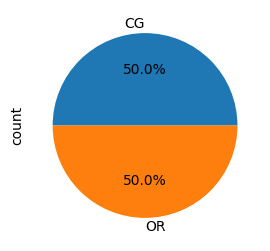

In [88]:
df['label'].value_counts().plot(kind = 'pie',figsize=(3,3),autopct='%1.1f%%')

In [89]:
print("Equal number of fake and real reviews")

Equal number of fake and real reviews


In [90]:
df['label'] = df['label'].map({'CG':0,'OR':1})

In [91]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [92]:
df.shape

(40432, 4)

In [93]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  int64  
 1   rating    40432 non-null  float64
 2   label     40432 non-null  int64  
 3   text_     40432 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [95]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [97]:
def preprocess(text):
  review = re.sub('[^a-zA-Z]',' ',text)
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords]
  review = ' '.join(review)
  return review

In [98]:
df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [99]:
df = df.dropna()
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [100]:
df['text_'][0]

'Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty'

In [101]:
for i in range(df.shape[0]):
  df['text_'][i] = preprocess(df['text_'][i])

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['text_'][i] = preprocess(df['text_'][i])
/tmp/ipython-input-2381940188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_'][i] = preprocess(df['text_'][i])
/tmp/ipython-input-2381940188.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical ex

In [102]:
df.head()

,category,rating,label,text_
0,3,5.0,0,love well made sturdi comfort love pretti
1,3,5.0,0,love great upgrad origin mine coupl year
2,3,5.0,0,pillow save back love look feel pillow
3,3,1.0,0,miss inform use great product price
4,3,5.0,0,nice set good qualiti set two month


In [ ]:
!pip install gensim

In [103]:
from gensim.models import Word2Vec
df['tokens'] = df['text_'].apply(lambda x: x.split())
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [104]:
df.tail()

,category,rating,label,text_,tokens
40427,1,4.0,1,read review say bra ran small order two band c...,"[read, review, say, bra, ran, small, order, tw..."
40428,1,5.0,0,sure exactli would littl larg small size think...,"[sure, exactli, would, littl, larg, small, siz..."
40429,1,2.0,1,wear hood wear hood wear jacket without hood s...,"[wear, hood, wear, hood, wear, jacket, without..."
40430,1,1.0,0,like noth dress reason gave star order size fi...,"[like, noth, dress, reason, gave, star, order,..."
40431,1,5.0,1,work wed industri work long day feet outsid he...,"[work, wed, industri, work, long, day, feet, o..."


In [105]:
import numpy as np
def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [108]:
a = df['text_'][0]
a = a.split()
a = sentence_vector(a,model)
a

array([ 0.04223434,  0.20369212,  0.6343158 ,  1.9906169 ,  0.01028046,
       -0.37273428,  0.6740055 , -0.17271627, -2.487561  , -0.24947755,
        0.7802202 ,  0.15707132, -0.45779696, -0.11091075, -0.1376201 ,
        0.90668595,  0.13696693,  0.5343642 , -0.80032027, -0.32345918,
       -1.6647003 ,  0.7556238 , -0.23176715,  0.30195618, -0.04687494,
        0.2704632 ,  0.7056456 ,  0.19611146,  0.01037195,  1.2254134 ,
        0.9429001 , -0.48202047,  0.6302532 , -1.448541  , -0.4464465 ,
        2.057721  ,  0.871806  ,  1.1716516 , -1.2227061 , -0.24245103,
       -0.46501425,  0.3757785 , -0.58145154, -0.20655856, -0.94798845,
       -0.14915255, -0.302926  , -1.0266885 , -0.31622288, -0.7406868 ,
        0.26677373, -1.1274555 , -0.7025668 ,  0.22557047, -0.5397003 ,
       -0.8915019 ,  0.12013691, -0.5920126 , -0.9661008 ,  1.4810245 ,
       -0.06940547,  0.3752015 ,  0.04047414, -0.67001116, -0.4636118 ,
        0.02924634,  0.5841292 ,  0.14906867, -1.5751407 ,  0.57

In [109]:
sample = np.vstack(a)
sample

array([[ 0.04223434],
       [ 0.20369212],
       [ 0.6343158 ],
       [ 1.9906169 ],
       [ 0.01028046],
       [-0.37273428],
       [ 0.6740055 ],
       [-0.17271627],
       [-2.487561  ],
       [-0.24947755],
       [ 0.7802202 ],
       [ 0.15707132],
       [-0.45779696],
       [-0.11091075],
       [-0.1376201 ],
       [ 0.90668595],
       [ 0.13696693],
       [ 0.5343642 ],
       [-0.80032027],
       [-0.32345918],
       [-1.6647003 ],
       [ 0.7556238 ],
       [-0.23176715],
       [ 0.30195618],
       [-0.04687494],
       [ 0.2704632 ],
       [ 0.7056456 ],
       [ 0.19611146],
       [ 0.01037195],
       [ 1.2254134 ],
       [ 0.9429001 ],
       [-0.48202047],
       [ 0.6302532 ],
       [-1.448541  ],
       [-0.4464465 ],
       [ 2.057721  ],
       [ 0.871806  ],
       [ 1.1716516 ],
       [-1.2227061 ],
       [-0.24245103],
       [-0.46501425],
       [ 0.3757785 ],
       [-0.58145154],
       [-0.20655856],
       [-0.94798845],
       [-0

In [110]:
df['tokens'] = df['tokens'].apply(lambda x: sentence_vector(x, model))

In [111]:
df.head()

,category,rating,label,text_,tokens
0,3,5.0,0,love well made sturdi comfort love pretti,"[0.042234335, 0.20369212, 0.6343158, 1.9906169..."
1,3,5.0,0,love great upgrad origin mine coupl year,"[-0.042687245, 0.067099094, -0.09794734, 0.529..."
2,3,5.0,0,pillow save back love look feel pillow,"[-0.22991763, 0.5033091, 0.18660508, 0.7611019..."
3,3,1.0,0,miss inform use great product price,"[0.14938687, -0.04089244, -0.0981516, 0.608283..."
4,3,5.0,0,nice set good qualiti set two month,"[-0.09785153, -0.0703487, 0.2439146, 0.6593739..."


In [112]:
textual_features = np.vstack(df['tokens'].values)
numeric_features = df[['category','rating']].values

In [113]:
X = np.hstack([numeric_features, textual_features])

In [114]:
y = df['label']

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model1 = LogisticRegression(max_iter = 200)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)
model1.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [116]:
x_train.shape

(32345, 102)

In [117]:
y_train.shape

(32345,)

In [118]:
y_pred = model1.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8435761098058613
[[3391  625]
 [ 640 3431]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4016
           1       0.85      0.84      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.84      0.84      0.84      8087
weighted avg       0.84      0.84      0.84      8087



In [119]:
def predict_review(text, model, classifier, default_category=3, default_rating=5.0):
    tokens = preprocess(text)
    tokens = tokens.split()
    text_vec = sentence_vector(tokens, model)
    numeric = np.array([default_category, default_rating])
    final_vec = np.hstack([text_vec, numeric]).reshape(1, -1)
    pred = classifier.predict(final_vec)[0]

    if pred == 1:
        return "REAL REVIEW"
    else:
        return "FAKE REVIEW"

user_text = input("Enter review text: ")

print("\nPrediction:", predict_review(user_text, model, model1))

Enter review text: Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty

Prediction: REAL REVIEW
